# Setting up and running analysis on batch runs

In [33]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install mesa
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install matplotlib


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: /opt/homebrew/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: /opt/homebrew/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: /opt/homebrew/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: /opt/homebrew/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip


In [34]:
import pandas as pd
import matplotlib as plt
#wolf_batch = pd.read_csv('./seg_model_batch_run_data.csv', index_col=None)
batch_long = pd.read_csv('./seg_model_steps_batch_run_data_long.csv', index_col=None)

### Get a sense of what's happening with your data by doing some digging around:

In [26]:
# take a peek at the overall structure
batch_long.head()

,Run Num,Grass Regrowth,Sheep Gain,Wolf Gain,Animal,Step Num,Count
0,0,25,2,18,Wolves,0,50
1,0,25,2,18,Sheep,0,100
2,0,25,2,18,Grass,0,188
3,1,25,2,18,Wolves,0,50
4,1,25,2,18,Sheep,0,100


### Some thinking about how to work with this and move forward:
We're interested in the relationship between wolves, sheep, and grass. We did a batch run to generate the CSV data (above) that varied the following parameters:

                params = {"grass_regrowth_time": [*range(25,37,5)], 
                        "sheep_gain_from_food": [*range(2,6,1)],
                        "wolf_gain_from_food": [*range(18,28,2)]
                        }

What we will likely want to look at is how these elements come together. We could replicate the plot from a single run, but I don't know how much that will help us progress on answering our question. Instead, we will want to think about creating separate universes where we focus on the variation of one element and how that impacts our findings. 

### Fun with plots
We want to think about how to best convey our data -- we can think about conveying what we observe overall and then breaking it out by our variables. We can do this based on the different parameters we vary. However, we do want to be mindful that this might just look like a lot of graphs. So, we want to be clear in our labels and to provide context whenever possible. For this setup, the context I'm providing is overall averages and relative averages. 

In [35]:
# first step is to create some averages for our data: overall and then by the various parameters we swept.

# overall averages: (you could go all-out here, but I tried to keep it somewhat simple)
batch_avgs = batch_long.groupby(['Animal', "Step Num"]).mean()
batch_avgs_grass = batch_long.groupby(['Animal', "Grass Regrowth", "Step Num"]).mean()
batch_avgs_wolf = batch_long.groupby(['Animal', "Wolf Gain", "Step Num"]).mean()
batch_avgs_sheep = batch_long.groupby(['Animal', "Sheep Gain", "Step Num"]).mean()
batch_avgs_sweep = batch_long.groupby(['Animal', "Grass Regrowth", "Wolf Gain", "Sheep Gain", "Step Num"]).mean()

batch_avgs


Run Num  Grass Regrowth  Sheep Gain  Wolf Gain       Count
Animal Step Num                                                            
Grass  0           299.5            30.0         3.5       22.0  199.918333
       1           299.5            30.0         3.5       22.0  164.080000
       2           299.5            30.0         3.5       22.0  143.256667
       3           299.5            30.0         3.5       22.0  130.646667
       4           299.5            30.0         3.5       22.0  123.175000
...                  ...             ...         ...        ...         ...
Wolves 46          299.5            30.0         3.5       22.0   17.943333
       47          299.5            30.0         3.5       22.0   16.391667
       48          299.5            30.0         3.5       22.0   15.205000
       49          299.5            30.0         3.5       22.0   13.843333
       50          299.5            30.0         3.5       22.0   12.761667

[153 rows x 5 columns]

[Text(0.5, 1.0, 'Batch Runs: Animal counts over 50 steps from 600 runs')]

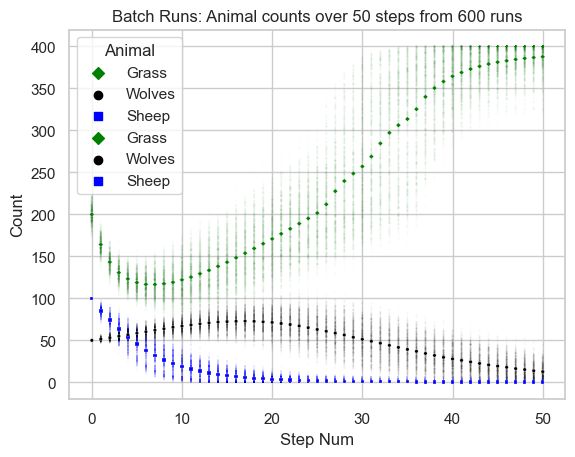

In [38]:
# Scatterplot party!
import seaborn as sns
sns.set_theme(style="whitegrid")



# Do an overall plot to see how things look: 
# Note that the transparency and size are low here -- just want a general sense of the data
sns.scatterplot(x="Step Num", y="Count", hue="Animal",  
                palette=["green", "black", "blue"], style= "Animal", 
                s= 2, hue_order=["Grass", "Wolves", "Sheep"],
                markers = {"Grass": "D", "Wolves": "o", "Sheep": "s" }, 
                alpha = 0.02,
             data=batch_long).set(title='Batch Runs: Animal counts over 50 steps from 600 runs')

# Also add in averages for overall
# Note that here we have a larger point size and no transparency
# Need to fix the legend XXX
sns.scatterplot(x="Step Num", y="Count", hue="Animal",  
                palette=["green", "black", "blue"], style= "Animal", 
                s= 6, hue_order=["Grass", "Wolves", "Sheep"],
                markers = {"Grass": "D", "Wolves": "o", "Sheep": "s" }, 
             data=batch_avgs).set(title='Batch Runs: Animal counts over 50 steps from 600 runs')

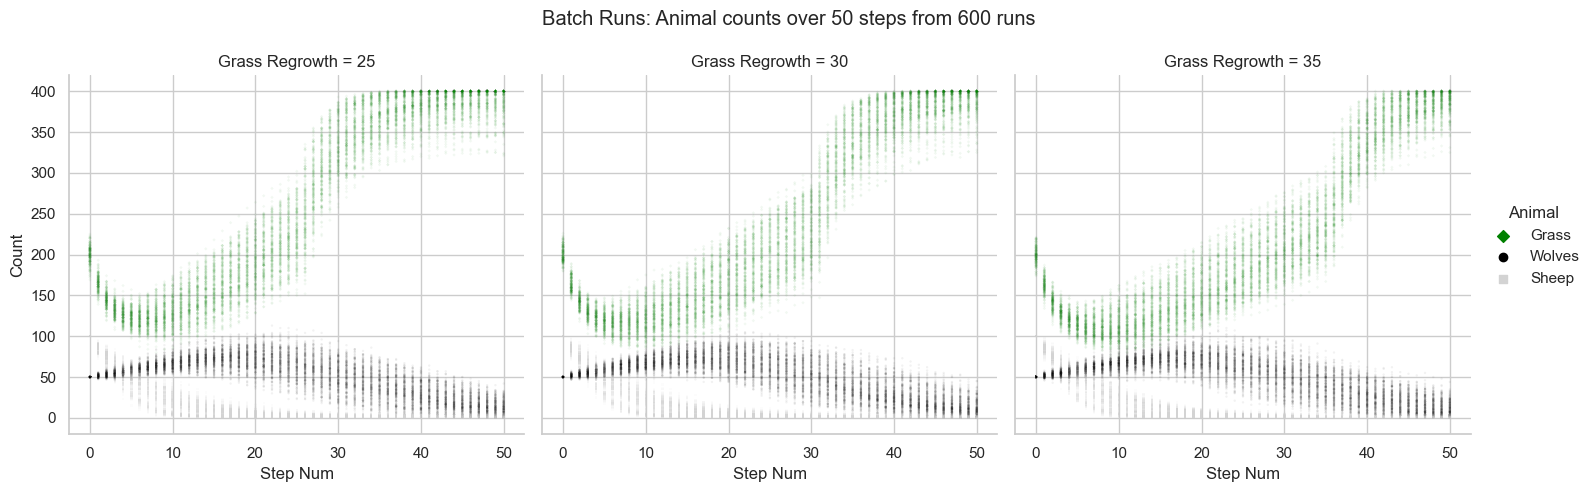

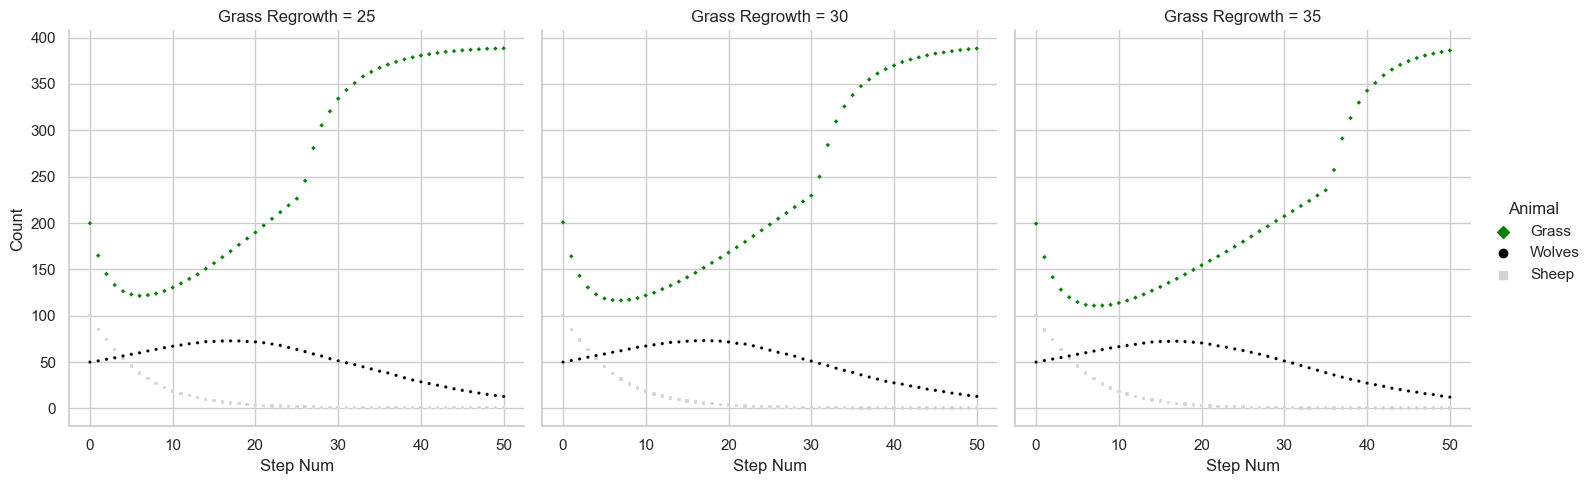

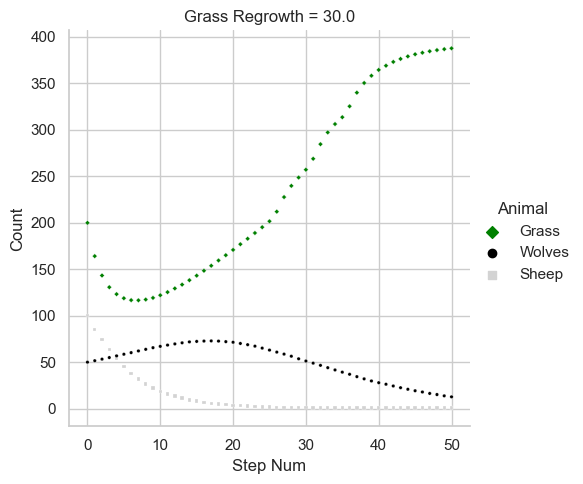

In [39]:
sns.set_theme(style="whitegrid")

## Here, we will do something similar to what we did above, but breaking it out by different components
# Look at previous plot but incorporate variables from runs (varying regrowth and gains)
facet_grass = sns.relplot(x="Step Num", y="Count", hue="Animal",  
                palette=["green", "black", "lightgray"], style= "Animal", 
                s= 3, hue_order=["Grass", "Wolves", "Sheep"],
                markers = {"Grass": "D", "Wolves": "o", "Sheep": "s" }, 
                alpha = 0.05, col = "Grass Regrowth",
             data=batch_long, kind = "scatter")

facet_grass.fig.subplots_adjust(top=0.85)

#add overall title
facet_grass.fig.suptitle('Batch Runs: Animal counts over 50 steps from 600 runs')

# Also add in averages for overall
# Note that here we have a larger point size and no transparency
# Need to fix the legend XXX
sns.relplot(x="Step Num", y="Count", hue="Animal",  
                palette=["green", "black", "lightgray"], style= "Animal", 
                s= 6, hue_order=["Grass", "Wolves", "Sheep"],
                markers = {"Grass": "D", "Wolves": "o", "Sheep": "s" }, 
               col = "Grass Regrowth", kind="scatter",
             data=batch_avgs_grass)
sns.relplot(x="Step Num", y="Count", hue="Animal",  
                palette=["green", "black", "lightgray"], style= "Animal", 
                s= 6, hue_order=["Grass", "Wolves", "Sheep"],
                markers = {"Grass": "D", "Wolves": "o", "Sheep": "s" }, 
               col = "Grass Regrowth", kind="scatter",
             data=batch_avgs)

